In [30]:
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import seaborn as sns
import pandas as pd
import numpy as np
from dataset_cleaning import chicago_cleaning, denver_cleaning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.metrics import r2_score

In [31]:
#df = chicago_cleaning()
df = denver_cleaning()

In [32]:
# correlations between sale price and other fields
df_corr = abs(df.corr()).sort_values(by='SEVERITY', ascending=False)[['SEVERITY']]
# a new dataframe including only the relevant predictors
df_small = df[df_corr[df_corr['SEVERITY']>0.1].index.tolist()]
df_small
#df_w_lanes = df_small.loc[df_small['LANE_CNT'] != 'NaN']
#df_no_lanes = df_small.drop('LANE_CNT', axis=1)
df = df_small.dropna(axis=0)
df_corr

,SEVERITY
SEVERITY,1.000000
TOP_TRAFFIC_ACCIDENT_OFFENSE_TRAF - ACCIDENT - SBI,0.623823
TOP_TRAFFIC_ACCIDENT_OFFENSE_TRAF - ACCIDENT,0.293184
TOP_TRAFFIC_ACCIDENT_OFFENSE_TRAF - ACCIDENT - FATAL,0.251346
TOP_TRAFFIC_ACCIDENT_OFFENSE_TRAF - ACCIDENT - HIT & RUN,0.140935
...,...
ROAD_CONDITION_WET,0.001534
ROAD_CONTOUR_STRAIGHT ON-LEVEL,0.001486
TU2_VEHICLE_TYPE_,0.000799
TU1_DRIVER_HUMANCONTRIBFACTOR_DISTRACTED-OTHER,0.000048


In [25]:
from sklearn.model_selection import train_test_split
y = df['SEVERITY']
X = df.drop('SEVERITY', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
y_train = np.log(y_train)
y_test = np.log(y_test)

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:>

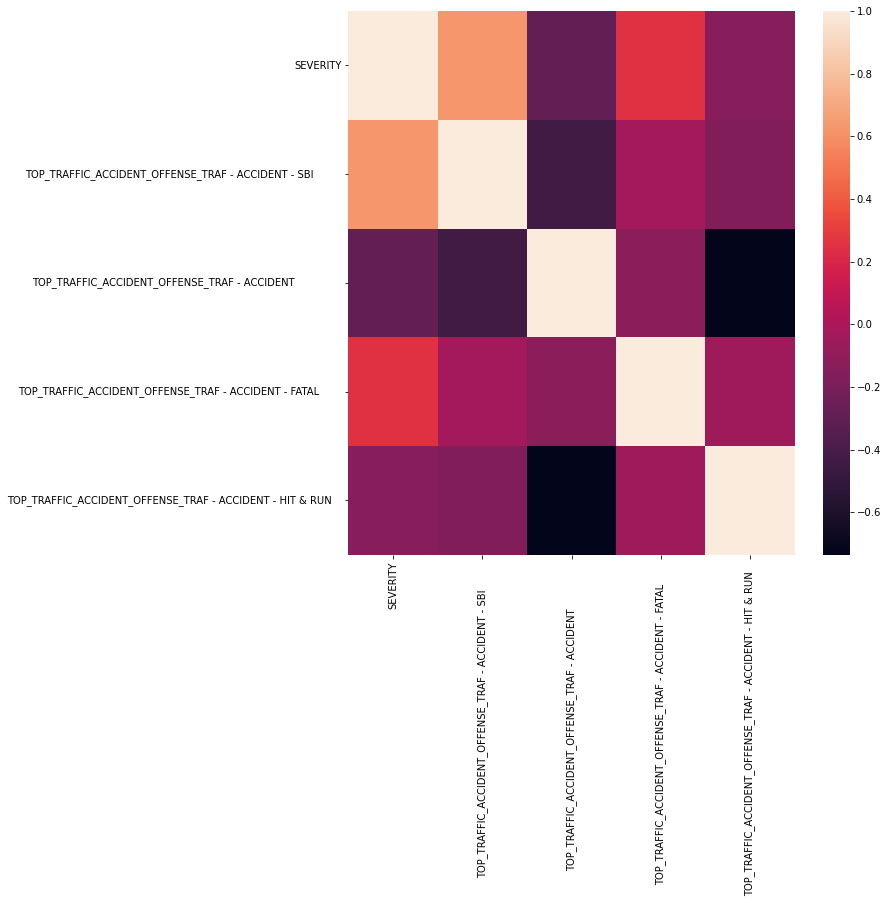

In [26]:
from matplotlib import pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.abs().corr())

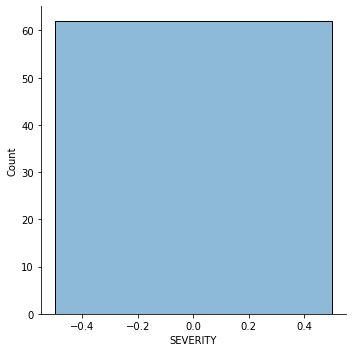

In [27]:
sns.displot(y_test, kde=True)
#stats.probplot(y_train, plot=plt)

In [28]:
from sklearn.preprocessing import StandardScaler
# initiate the standard scaler
ss = StandardScaler()
# fit 
Z_train = ss.fit_transform(X_train)
# transform the df
Z_train = pd.DataFrame(ss.transform(X_train), columns=X_train.columns)


In [29]:
from sklearn.linear_model import RidgeCV
r_alphas = np.logspace(0, 5, 100)
# initiate the cross validation over alphas
ridge_model = RidgeCV(alphas=r_alphas, scoring='r2')
# fit the model with the best alpha

ridge_model = ridge_model.fit(Z_train, y_train)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
Z_test = pd.DataFrame(ss.transform(X_test), columns=X_test.columns)

ridge_model.score(Z_test, y_test)

0.026985500914020966

In [ ]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train, y_train)
print(clf.coef_)
print(clf.intercept_)
print(X_train.columns)

[ 0.         -0.          0.          0.00286505 -0.          0.
  0.         -0.          0.         -0.         -0.         -0.        ]
1.0164645417459517
Index(['INTERSECTION_RELATED_I_Y',
       'PRIM_CONTRIBUTORY_CAUSE_FOLLOWING TOO CLOSELY',
       'PRIM_CONTRIBUTORY_CAUSE_FAILING TO YIELD RIGHT-OF-WAY', 'LANE_CNT',
       'PRIM_CONTRIBUTORY_CAUSE_UNABLE TO DETERMINE',
       'TRAFFICWAY_TYPE_DIVIDED - W/MEDIAN (NOT RAISED)',
       'TRAFFIC_CONTROL_DEVICE_RAILROAD CROSSING GATE',
       'WEATHER_CONDITION_UNKNOWN',
       'PRIM_CONTRIBUTORY_CAUSE_FAILING TO REDUCE SPEED TO AVOID CRASH',
       'TRAFFICWAY_TYPE_NOT DIVIDED', 'TRAFFIC_CONTROL_DEVICE_NO CONTROLS',
       'PRIM_CONTRIBUTORY_CAUSE_IMPROPER OVERTAKING/PASSING'],
      dtype='object')
